## Learning rate 조절 

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Training our model using this dataset
x_data = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


In [14]:
X = tf.placeholder("float", [None, 3])
Y = tf.placeholder("float", [None, 3])

W = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# Try to change learning_rate to small numbers
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1).minimize(cost)

# Correct prediction Test model
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [15]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    
    #training process is based on training data
    for step in range(201):
        cost_val, W_val, _ = sess.run(
            [cost, W, optimizer], feed_dict={X: x_data, Y: y_data})
        print(step, cost_val)
    
    # Evaluation is based on test data
    # predict
    print("Prediction:", sess.run(prediction, feed_dict={X: x_test}))
    # Calculate the accuracy
    print("Accuracy: ", sess.run(accuracy, feed_dict={X: x_test, Y: y_test}))

0 2.46245
1 1.67474
2 1.01396
3 0.889447
4 0.869322
5 0.860114
6 0.852392
7 0.846404
8 0.841017
9 0.836299
10 0.831888
11 0.827795
12 0.823885
13 0.820154
14 0.816545
15 0.813053
16 0.809653
17 0.806338
18 0.803097
19 0.799926
20 0.796819
21 0.793773
22 0.790783
23 0.787847
24 0.784964
25 0.782131
26 0.779346
27 0.776608
28 0.773915
29 0.771267
30 0.768661
31 0.766096
32 0.763572
33 0.761087
34 0.758641
35 0.756232
36 0.753859
37 0.751521
38 0.749218
39 0.746949
40 0.744712
41 0.742508
42 0.740334
43 0.738192
44 0.736079
45 0.733995
46 0.731939
47 0.729911
48 0.727911
49 0.725936
50 0.723988
51 0.722065
52 0.720167
53 0.718293
54 0.716443
55 0.714616
56 0.712811
57 0.711029
58 0.709268
59 0.707529
60 0.705811
61 0.704113
62 0.702435
63 0.700776
64 0.699137
65 0.697517
66 0.695914
67 0.69433
68 0.692764
69 0.691215
70 0.689683
71 0.688168
72 0.686669
73 0.685187
74 0.68372
75 0.682268
76 0.680832
77 0.67941
78 0.678003
79 0.676611
80 0.675232
81 0.673868
82 0.672517
83 0.671179
84 0.669

## data normalization 실습 without MinMax

In [16]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

In [17]:
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [18]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        cost_val, hy_val, _ = sess.run(
            [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  9.20215e+10 
Prediction:
 [[ 214129.453125]
 [ 432396.75    ]
 [ 339879.375   ]
 [ 237873.015625]
 [ 280571.625   ]
 [ 282945.78125 ]
 [ 259233.171875]
 [ 330407.125   ]]
1 Cost:  1.01102e+26 
Prediction:
 [[ -7.09269284e+12]
 [ -1.42783178e+13]
 [ -1.12322381e+13]
 [ -7.87373883e+12]
 [ -9.27962287e+12]
 [ -9.35772711e+12]
 [ -8.57668007e+12]
 [ -1.09198191e+13]]
2 Cost:  inf 
Prediction:
 [[  2.35096890e+20]
 [  4.73274137e+20]
 [  3.72307691e+20]
 [  2.60985692e+20]
 [  3.07585616e+20]
 [  3.10174517e+20]
 [  2.84285645e+20]
 [  3.61952156e+20]]
3 Cost:  inf 
Prediction:
 [[ -7.79260243e+27]
 [ -1.56873083e+28]
 [ -1.23406392e+28]
 [ -8.65072253e+27]
 [ -1.01953390e+28]
 [ -1.02811514e+28]
 [ -9.42303074e+27]
 [ -1.19973916e+28]]
4 Cost:  inf 
Prediction:
 [[  2.58296308e+35]
 [  5.19976966e+35]
 [  4.09047120e+35]
 [  2.86739872e+35]
 [  3.37938259e+35]
 [  3.40782590e+35]
 [  3.12339066e+35]
 [  3.97669718e+35]]
5 Cost:  inf 
Prediction:
 [[-inf]
 [-inf]
 [-inf]
 [-inf]
 

## data normalization with MinMax

In [19]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


In [20]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

xy = MinMaxScaler(xy)
print(xy)

[[ 0.99999999  0.99999999  0.          1.          1.        ]
 [ 0.70548491  0.70439552  1.          0.71881782  0.83755791]
 [ 0.54412549  0.50274824  0.57608696  0.606468    0.6606331 ]
 [ 0.33890353  0.31368023  0.10869565  0.45989134  0.43800918]
 [ 0.51436     0.42582389  0.30434783  0.58504805  0.42624401]
 [ 0.49556179  0.42582389  0.31521739  0.48131134  0.49276137]
 [ 0.11436064  0.          0.20652174  0.22007776  0.18597238]
 [ 0.          0.07747099  0.5326087   0.          0.        ]]


In [21]:
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [22]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        cost_val, hy_val, _ = sess.run(
            [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  1.09015 
Prediction:
 [[-0.309044  ]
 [-1.02813196]
 [-0.57128328]
 [-0.08181371]
 [-0.3141489 ]
 [-0.42486733]
 [-0.08411439]
 [-0.52518469]]
1 Cost:  1.09008 
Prediction:
 [[-0.30899292]
 [-1.02808166]
 [-0.57124168]
 [-0.08178209]
 [-0.31411123]
 [-0.42483091]
 [-0.0840904 ]
 [-0.52516085]]
2 Cost:  1.09 
Prediction:
 [[-0.30894178]
 [-1.02803135]
 [-0.57120019]
 [-0.08175047]
 [-0.31407332]
 [-0.42479432]
 [-0.08406638]
 [-0.52513695]]
3 Cost:  1.08992 
Prediction:
 [[-0.3088907 ]
 [-1.02798104]
 [-0.57115871]
 [-0.08171885]
 [-0.31403559]
 [-0.4247579 ]
 [-0.08404239]
 [-0.52511305]]
4 Cost:  1.08984 
Prediction:
 [[-0.30883956]
 [-1.02793062]
 [-0.5711171 ]
 [-0.08168729]
 [-0.31399781]
 [-0.42472142]
 [-0.08401836]
 [-0.52508914]]
5 Cost:  1.08977 
Prediction:
 [[-0.30878848]
 [-1.02788031]
 [-0.57107562]
 [-0.08165567]
 [-0.31395996]
 [-0.42468488]
 [-0.08399437]
 [-0.5250653 ]]
6 Cost:  1.08969 
Prediction:
 [[-0.30873737]
 [-1.02783   ]
 [-0.57103413]
 [-0.08162411]


## MNIST 실습

In [24]:
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [26]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [29]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
logits = tf.matmul(X,W) + b
hypothesis = tf.nn.softmax(logits)

cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = Y)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


In [30]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [31]:
# parameters
training_epochs = 15
batch_size = 100

## what is epoch?

one epoch = one forward pass and one backend pass of all the training examples

batchsize = the number of tarining example in one forward/backward pass

number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).

Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

Epoch: 0001 cost = 2.778248697
Epoch: 0002 cost = 1.056700854
Epoch: 0003 cost = 0.852730018
Epoch: 0004 cost = 0.749228868
Epoch: 0005 cost = 0.682466504
Epoch: 0006 cost = 0.634199119
Epoch: 0007 cost = 0.597917128
Epoch: 0008 cost = 0.569442023
Epoch: 0009 cost = 0.546011793
Epoch: 0010 cost = 0.526723328
Epoch: 0011 cost = 0.509755617
Epoch: 0012 cost = 0.495010713
Epoch: 0013 cost = 0.481985383
Epoch: 0014 cost = 0.470390337
Epoch: 0015 cost = 0.460224089
Learning finished
Accuracy:  0.8917
Label:  [9]
Prediction:  [9]


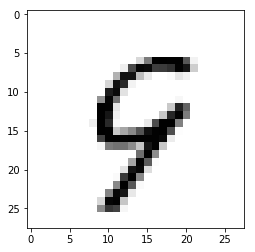

In [33]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()